In [1]:
import pandas as pd
import seaborn as sns
import pylab as plt
import numpy as np
%matplotlib inline

In [21]:
titanic=pd.read_csv("../../../02_week/data/train.csv")

In [18]:
import missingno

<AxesSubplot:>

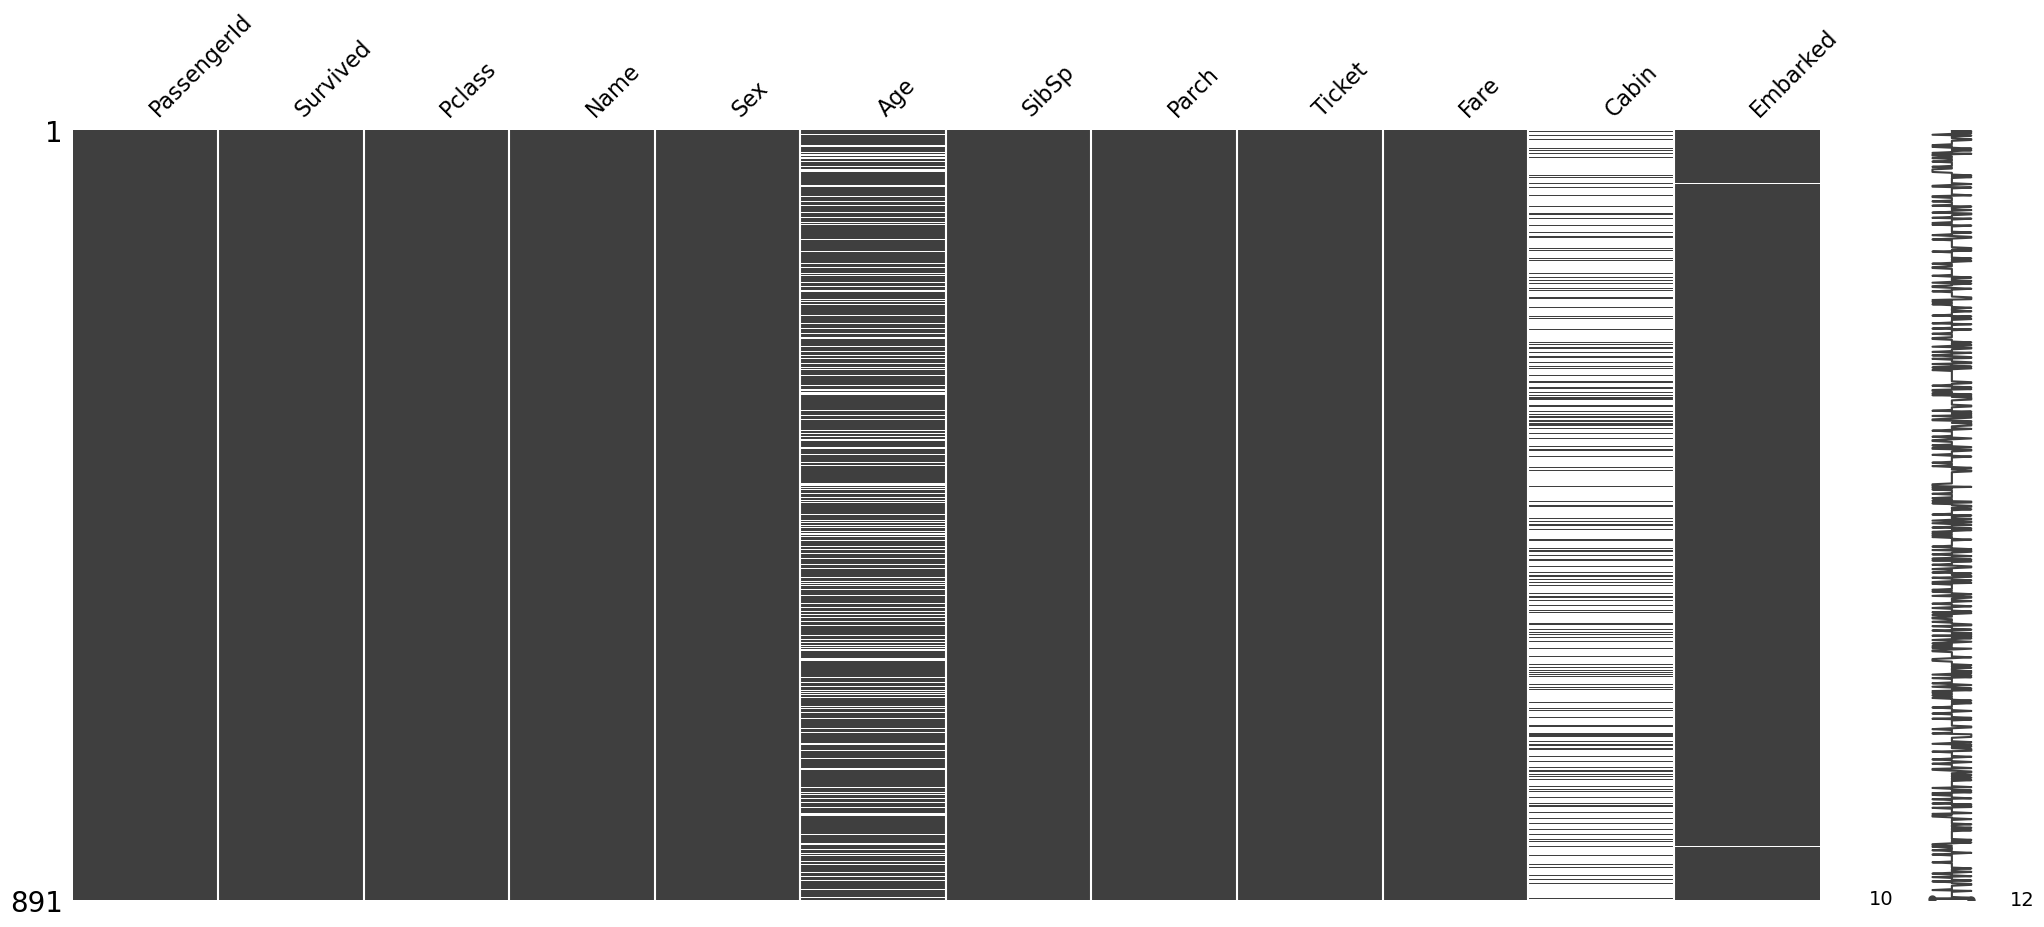

In [24]:
missingno.matrix(titanic)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df=titanic

In [16]:
df["Pclass"].to_string

<bound method Series.to_string of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>

In [13]:
str(s)

'0      3\n1      1\n2      3\n3      1\n4      3\n      ..\n886    2\n887    1\n888    3\n889    1\n890    3\nName: Pclass, Length: 891, dtype: int64'

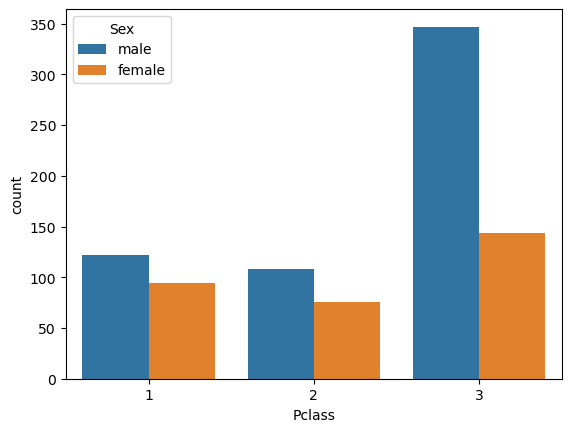

In [4]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax = sns.countplot(x="Pclass", hue="Sex",data=titanic)
#sns.catplot(x="Pclass", hue="Sex",kind="count",data=titanic)
plt.savefig("Class_and_Sex.png")

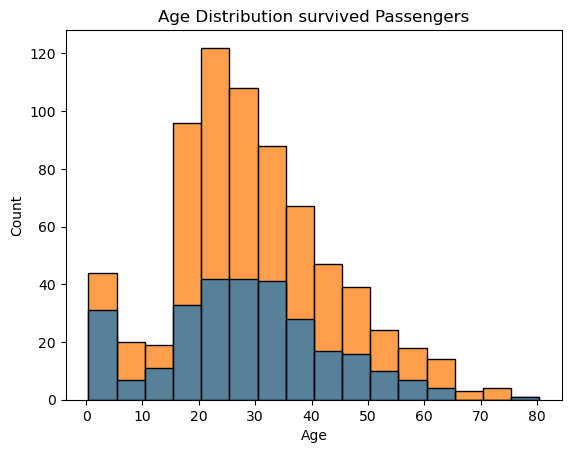

In [5]:
fig=plt.figure()
ax=fig.add_subplot(111)

sns.histplot(data=titanic, x="Age", binwidth=5, ax=ax, color="C1")
sns.histplot(data=titanic[titanic["Survived"]==1], x="Age", binwidth=5, ax=ax, color="C0")

plt.title("Age Distribution survived Passengers")
plt.savefig("Age_distribution_survived.png")

In [6]:
average_age_survived=titanic[titanic["Survived"]==1]["Age"].mean()

In [7]:
average_age_dead=titanic[titanic["Survived"]==0]["Age"].mean()

In [8]:
print("average age survived: "+ str(average_age_survived))

average age survived: 28.343689655172415


In [9]:
print("average age drowned: "+ str(average_age_dead))

average age drowned: 30.62617924528302


In [10]:
df=titanic

Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.


In [11]:
survived_firstclass_male=len(df[(df["Survived"]==1) * (df["Pclass"]==1) * (df["Sex"]=="male")])
survived_firstclass_female=len(df[(df["Survived"]==1) * (df["Pclass"]==1) * (df["Sex"]=="female")])
survived_secondclass_male=len(df[(df["Survived"]==1) * (df["Pclass"]==2) * (df["Sex"]=="male")])
survived_secondclass_female=len(df[(df["Survived"]==1) * (df["Pclass"]==2) * (df["Sex"]=="female")])
survived_thirdclass_male=len(df[(df["Survived"]==1) * (df["Pclass"]==3) * (df["Sex"]=="male")])
survived_thirdclass_female=len(df[(df["Survived"]==1) * (df["Pclass"]==3) * (df["Sex"]=="female")])


In [12]:
for Pclass in [1,2,3]:
    for sex in ["male", "female"]: 
        for survived in [1,0]:
            if survived==1:
                print( str(Pclass)+" Class "+sex+" survived: ",len(df[(df["Survived"]==survived) * (df["Pclass"]==Pclass) * (df["Sex"]==sex)]))
            else:
                print( str(Pclass)+" Class "+sex+" drowned: ",len(df[(df["Survived"]==survived) * (df["Pclass"]==Pclass) * (df["Sex"]==sex)]))
    print("")        
            
            
            
            

1 Class male survived:  45
1 Class male drowned:  77
1 Class female survived:  91
1 Class female drowned:  3

2 Class male survived:  17
2 Class male drowned:  91
2 Class female survived:  70
2 Class female drowned:  6

3 Class male survived:  47
3 Class male drowned:  300
3 Class female survived:  72
3 Class female drowned:  72



<Figure size 640x480 with 0 Axes>

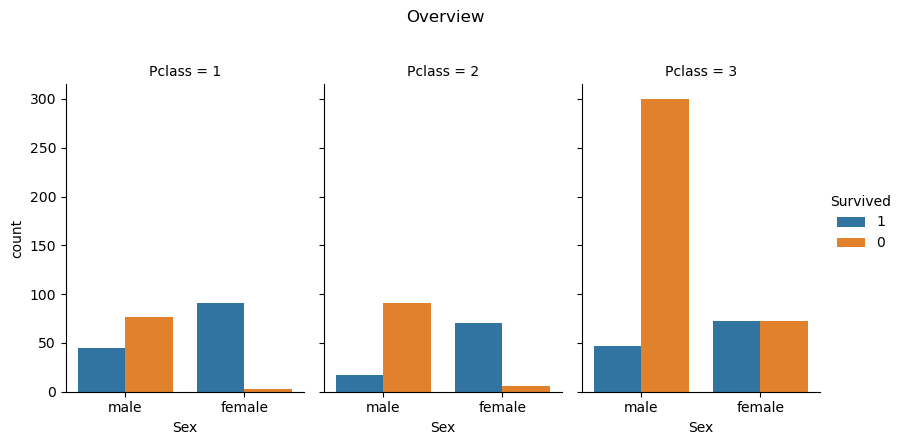

In [13]:
fig=plt.figure()

sns.catplot(data=df,x="Sex",hue="Survived",col="Pclass", kind="count", height=4, aspect=.7, hue_order=[1,0])

plt.suptitle("Overview", y=1.1)
plt.savefig("Overviewplot.png")

<AxesSubplot:xlabel='Age', ylabel='Count'>

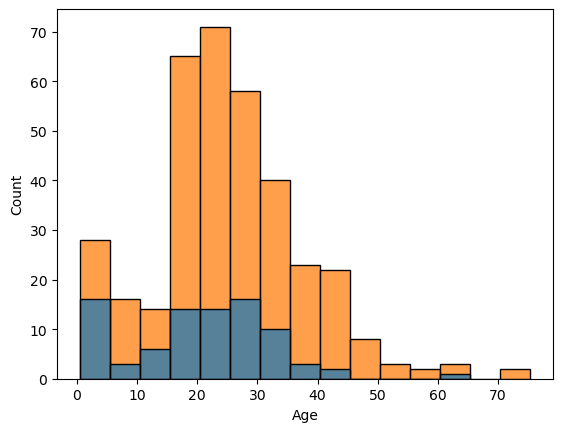

In [14]:
sns.histplot(data=titanic[titanic["Pclass"]==3], x="Age", binwidth=5, color="C1")
sns.histplot(data=titanic[(titanic["Pclass"]==3)*(titanic["Survived"]==1)], x="Age", binwidth=5, color="C0")

<AxesSubplot:xlabel='Age', ylabel='Count'>

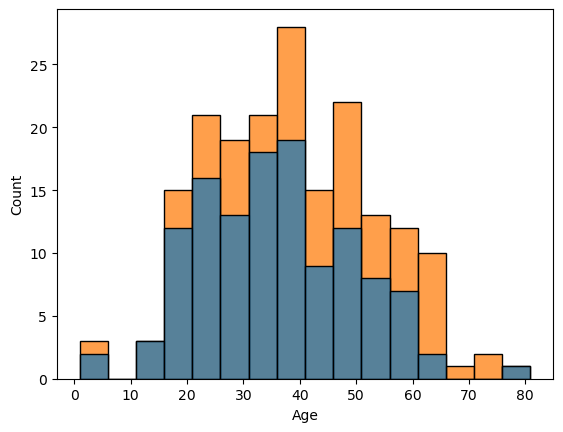

In [15]:
sns.histplot(data=titanic[titanic["Pclass"]==1], x="Age", binwidth=5, color="C1")
sns.histplot(data=titanic[(titanic["Pclass"]==1)*(titanic["Survived"]==1)], x="Age", binwidth=5, color="C0")

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
df["encode_sex"]=(df["Sex"]=="male")*1

In [20]:
df["male"]=pd.get_dummies(df['Sex'] , drop_first=True)

In [31]:
#check if encode_sex and male are actually the same
len(df[(df["encode_sex"]!=df["male"])])==0

True

In [32]:
X = df[['encode_sex','Pclass','Age']]   # <=== features/independent variables
y = df['Survived']    

In [33]:
Group=df.groupby(["Sex","Pclass"])

In [26]:
Group["Age"].apply("mean")

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [37]:
cdict={}
for (sex,pclass),sub_df in Group:
    cdict[sex+"_"+str(pclass)]=sub_df


for i, key in enumerate(cdict.keys()):
    cur_df=cdict[key]
    meanage=cur_df["Age"].mean()
    cur_df["new_Age"]=cur_df["Age"].fillna(meanage)
    
    if i==0: final_df=cur_df
    if i>0:
        final_df=pd.concat([final_df, cur_df])
        
        
        

In [38]:
final_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,encode_sex,male,new_Age
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,38.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,35.000000
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,58.000000
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0,0,34.611765
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0,0,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,1,1,19.000000
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1,1,26.507589
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,1,1,33.000000
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1,1,25.000000


In [39]:
final_df["class_sex"]=final_df["Pclass"].apply(str) + "_" +final_df["Sex"]

In [40]:
final_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,encode_sex,male,new_Age,class_sex
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,38.000000,1_female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,35.000000,1_female
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,58.000000,1_female
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0,0,34.611765,1_female
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0,0,49.000000,1_female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,1,1,19.000000,3_male
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1,1,26.507589,3_male
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,1,1,33.000000,3_male
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1,1,25.000000,3_male


In [41]:
final_df.groupby("class_sex")["Age"].apply("mean")

class_sex
1_female    34.611765
1_male      41.281386
2_female    28.722973
2_male      30.740707
3_female    21.750000
3_male      26.507589
Name: Age, dtype: float64

In [42]:
final_df["new_Age_2"]=final_df["Age"].fillna(final_df.groupby("class_sex")["Age"].transform("mean"))

In [45]:
# check if new_Age and new_Age_2 are the same
len(final_df[(final_df["new_Age"]!=final_df["new_Age_2"])])==0

True

In [51]:
X = final_df[['encode_sex','Pclass','new_Age']]   # <=== features/independent variables
y = final_df['Survived']    

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=12)

In [157]:
#dropna=Xtrain["Age"].isna()==False

In [53]:
m = LogisticRegression() 

In [54]:
Xtrain

,encode_sex,Pclass,new_Age
151,0,1,22.000000
615,0,2,24.000000
246,0,3,25.000000
445,1,1,4.000000
83,1,1,28.000000
...,...,...,...
374,0,3,3.000000
436,0,3,21.000000
572,1,1,36.000000
333,1,3,16.000000


In [55]:

m.fit(Xtrain, ytrain) 

LogisticRegression()

In [56]:
m.score(Xtrain,ytrain)

0.800561797752809

In [57]:
m.score(Xtest,ytest)

0.7932960893854749

In [69]:
ypred=m.predict(Xtest)
ypred_train=m.predict(Xtrain)

In [61]:
from sklearn import metrics

In [64]:
metrics.accuracy_score(ytest,ypred)

0.7932960893854749

In [65]:
metrics.precision_score(ytest,ypred)

0.7681159420289855

In [66]:
metrics.recall_score(ytest,ypred)

0.7162162162162162

In [72]:
metrics.f1_score(ytest,ypred),metrics.f1_score(ytrain,ypred_train)

(0.7412587412587412, 0.7269230769230768)

In [74]:
metrics.confusion_matrix(ytest,ypred)

array([[89, 16],
       [21, 53]])

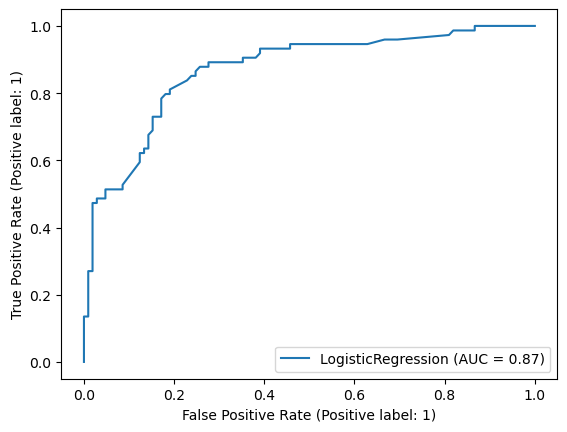

In [77]:
metrics.plot_roc_curve(m, Xtest,ytest)